In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner 
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KUnet ***
Working directory: /tmp/tmpp9k1sqgqGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')
# images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
# masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

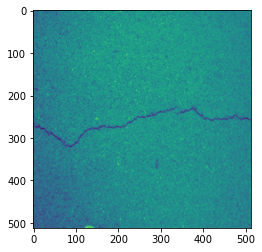

In [5]:
imshow(images[0])

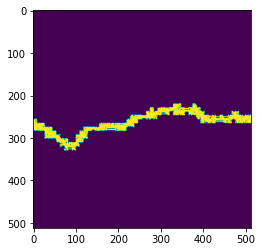

In [6]:
imshow(masks[0])

In [7]:
images = images[:6012]

In [8]:
masks = masks[:6012]

In [7]:
images.shape

(11298, 512, 512, 1)

In [8]:
masks.shape

(11298, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 27s 2s/step - loss: 0.8919 - dice_coeff: 0.0979 - val_loss: 0.4179 - val_dice_coeff: 0.1523
Epoch 2/100
9/9 [==============================] - 9s 1s/step - loss: 0.8482 - dice_coeff: 0.1073 - val_loss: 0.4796 - val_dice_coeff: 0.1516
Epoch 3/100
9/9 [==============================] - 9s 1s/step - loss: 0.8156 - dice_coeff: 0.1142 - val_loss: 0.5356 - val_dice_coeff: 0.1493
Epoch 4/100
9/9 [==============================] - 9s 1s/step - loss: 0.7897 - dice_coeff: 0.1186 - val_loss: 0.5758 - val_dice_coeff: 0.1478
Epoch 5/100
9/9 [==============================] - 9s 1s/step - loss: 0.7712 - dice_coeff: 0.1205 - val_loss: 0.5894 - val_dice_coeff: 0.1495
Epoch 6/100
9/9 [==============================] - 9s 1s/step - loss: 0.7557 - dice_coeff: 0.1221 - val_loss: 0.5403 - val_dice_coeff: 0.1616
Epoch 7/100
9/9 [==============================] - 9s 1s/step - loss: 0.7410 - dice_coeff: 0.1238 - val_loss: 0.4514 - va

In [11]:
R.classifier_scores

[[0.4209626019001007, 0.25856244564056396],
 [0.1668105274438858, 0.38014689087867737],
 [0.1539263129234314, 0.43394413590431213],
 [0.15097597241401672, 0.4627816677093506],
 [0.14971762895584106, 0.39127692580223083],
 [0.12206023931503296, 0.47184285521507263],
 [0.11432881653308868, 0.4923166334629059]]

In [12]:
R.discriminator_scores

[[0.00023845143732614815, 1.0],
 [0.0005839709774591029, 1.0],
 [0.0005227060173638165, 1.0],
 [0.00045831059105694294, 1.0],
 [0.0003398221160750836, 1.0],
 [0.0003571587731130421, 1.0],
 [0.0005691866390407085, 1.0]]

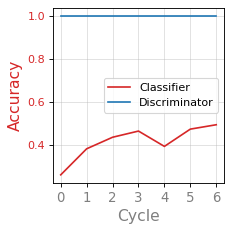

In [13]:
R.plot() 

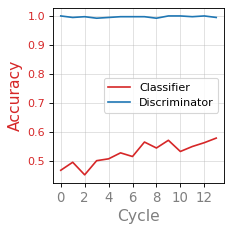

In [20]:
R.plot() //This is when I run for the first time